<a href="https://colab.research.google.com/github/SerArtDev/redes-neuronales/blob/main/TensorFlow_introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow
Es una plataforma de código abierto para Machine Learning, desarrollada y mantenida por Google.

## Características importantes
- **Eager execution**: El modelo se ejecuta a medida que se va construyendo. En Keras se añadían capas con add y al final se compilaba con compile, pero con Eager execution no es necesario el compile y podemos ver los errores que van surgiendo.
- **APIs de alto nivel intuitivas**: Simplifican la forma de crear y entrenar modelos. Una de estas APIs es Keras.
- **Crossplatform deploy**: Permite lanzar proyectos a distintas plataformas, incluyendo web, dispositivos móviles y sistemas embebidos.
- **Escalabilidad**: TensorFlow permite escalamiento con cpu y gpu.
- **Ecosistemas**: Ofrece ecosistemas con herramientas específicas.

Existen varios ecosistemas de TensorFlow que pueden ser interesantes dependiendo de la aplicación:

- **TensorFlow** lite: Es una solución de bajo peso pensado para dispositivos móviles y sistemas embebidos.
- **TensorFlow.js**: Permite ejecutar sistemas de machine learning en la web.
- **TensorFlow Extended (TFX)**: Ofrecre una gran cantidad de herramientas para modelos grandes en producción, permitiendo monitorearlos y escalarlos.
- **TensorFlow Hub**: Es un repositorio con módulos de machine learning reutilizables.
- **TensorBoard**: Conjunto de herramientas para visualización.



## TensorFlow para Procesamiento de Imágenes

El procesamiento de imágenes tiene aplicaciones como:
 - Extracción de información relevante.
 - Aplicaciones médicas.
 - Conducción automática de vehículos.
 - Sistemas de reconocimiento facial.

TensorFlow ofrece facilidad en la implementación de modelos que permitan estas aplicaciones gracias a sus APIs de alto nivel, modelos preentrenados, escalabilidad y soporte de la comunidad.

### Capa de Convolución Transpuesta

Esta capa procesa datos para hacer una operación similar a la inverse de la convolución. Recordando, la convolución hace productor punto entre la imagen y una matriz pequeña que se desliza sobre ella para realizar esta operación, lo resalta características interesantes y reduce la cantidad de pixeles. La convolución transpuesta tiene aplicaciones como:
- Mejorar la resolución de una imagen
- Generative Adversarial Networks (GANs): Generar imágenes de vectores latentes.
- Semantic Segmentation: Segmentar en partes una imagen dando etiqueta a cada una de ella basado en sus características.



In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo una entrada de imágenes de 28x28 en escala de grises
input_layer = Input(shape=(28, 28, 1))
# Capa de convolución
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='same')(input_layer)
# Capa de convolución transpuesta
trans_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation="sigmoid", padding='same')(conv_layer)
# Modelo
model = Model(inputs=input_layer, outputs=trans_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [4]:
# Entrenamiento
X_train = np.random.rand(100, 28, 28, 1)
y_train = X_train

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.0000e+00 - loss: 0.0845 - val_accuracy: 0.0000e+00 - val_loss: 0.0825
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0814 - val_accuracy: 0.0000e+00 - val_loss: 0.0798
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0787 - val_accuracy: 0.0000e+00 - val_loss: 0.0771
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0760 - val_accuracy: 0.0000e+00 - val_loss: 0.0746
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0736 - val_accuracy: 0.0000e+00 - val_loss: 0.0721
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0711 - val_accuracy: 0.0000e+00 - val_loss: 0.0695
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0685 - val_accuracy: 0.0000e+00 - val_loss: 0.0670
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e

In [5]:
# Evaluación del modelo
x_test = np.random.rand(10, 28, 28, 1)
y_test = x_test

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0590
Loss: 0.059049833565950394, Accuracy: 0.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


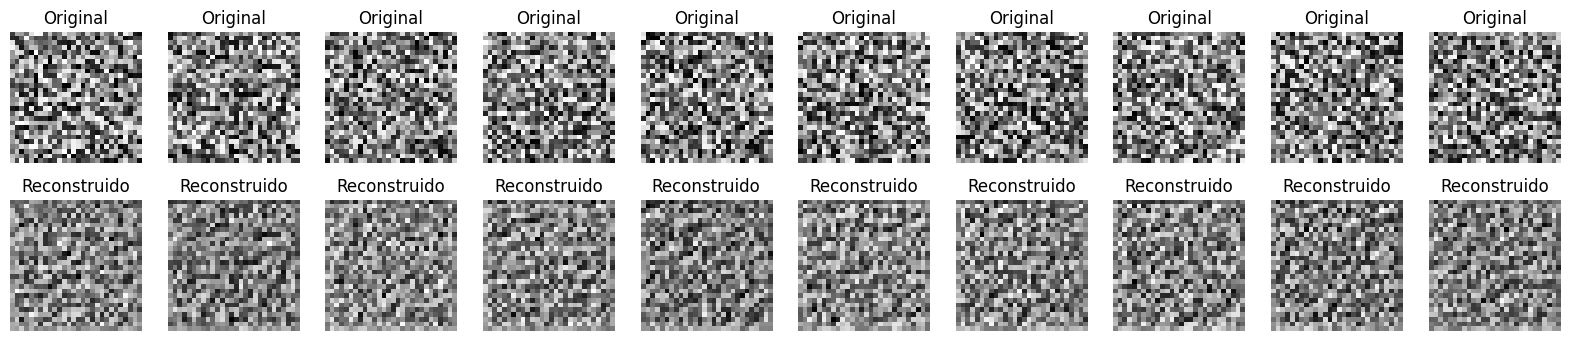

In [6]:
# Visualización de imágenes reconstruidas
y_pred = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar el original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Mostrar el reconstruido
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruido")
    plt.axis('off')

plt.show()